In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from selenium import webdriver 
import time 
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("D:/New folder/Semester 3/ADY301m/file csv/RealEstateUnitedStates.csv")
df.head()

,Year,Month,Region,Home Size,Average Sales Price,Number of Households (Thousands)
0,2022,December,Midwest,Double,144300,28280
1,2022,December,Midwest,Single,82300,28280
2,2022,December,Midwest,Total1,104700,28280
3,2022,December,Northeast,Double,158300,22630
4,2022,December,Northeast,Single,75300,22630


In [8]:
df.isnull().sum()

Year                                0
Month                               0
Region                              0
Home Size                           0
Average Sales Price                 0
Number of Households (Thousands)    0
dtype: int64

In [12]:
st=df["Average Sales Price"].describe()
print(f"Thống kê mô tả:")
st

Thống kê mô tả:


count      1575.000000
mean      83472.317460
std       28742.852302
min       33900.000000
25%       59350.000000
50%       81700.000000
75%      100300.000000
max      178200.000000
Name: Average Sales Price, dtype: float64

In [13]:
# Tính hệ số biến thiên và in kết quả
print(f"Coefficient of Variation : {df['Average Sales Price'].std() / df['Average Sales Price'].mean()}")

# Tính Mean Absolute Deviation (MAD) và in kết quả
print(f"Mean Absolute Deviation (MAD): {df['Average Sales Price'].abs().mean()}")

# Tính IQR, giới hạn trên và dưới
IQR = df['Average Sales Price'].quantile(0.75) - df['Average Sales Price'].quantile(0.25)
low = df['Average Sales Price'].quantile(0.25) - 1.5 * IQR
up = df['Average Sales Price'].quantile(0.75) + 1.5 * IQR

# In ra các giá trị ngoại lai (outliers)
outliers = df["Average Sales Price"][(df['Average Sales Price'] < low) | (df['Average Sales Price'] > up)]
print(f"Outliers: \n{outliers}")

Coefficient of Variation : 0.3443399342067781
Mean Absolute Deviation (MAD): 83472.31746031746
Outliers: 
12     162400
27     161800
42     167300
48     162000
57     163900
72     166400
87     178200
102    174500
111    162400
126    169900
129    168000
132    176600
147    171600
162    163600
192    170600
Name: Average Sales Price, dtype: int64


C:\Users\HOAIPHUC\AppData\Local\Temp\ipykernel_16048\2839491759.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg_price.index, y=region_avg_price.values, palette='viridis')


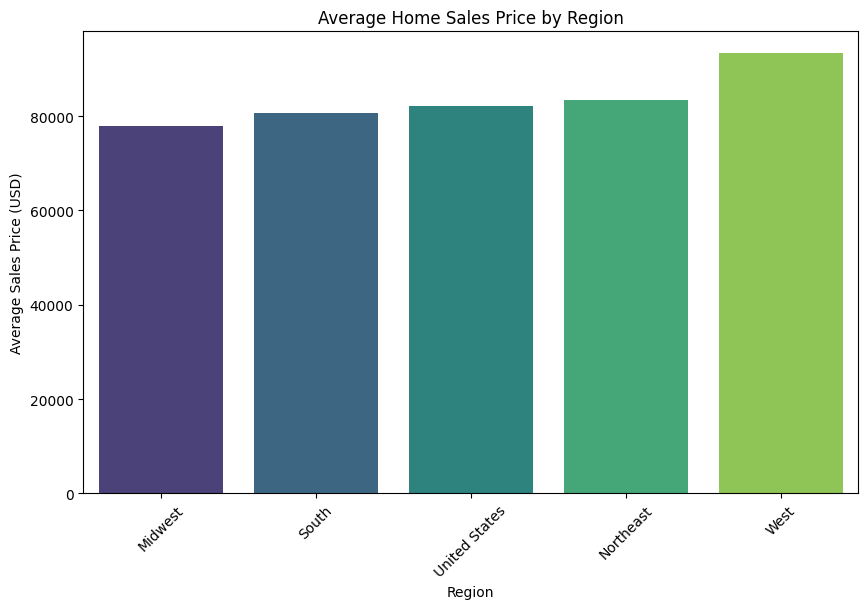

In [25]:
#Visualization
region_avg_price = df.groupby('Region')['Average Sales Price'].mean().sort_values()

# Bar plot of average sales price by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_avg_price.index, y=region_avg_price.values, palette='viridis')
plt.title('Average Home Sales Price by Region')
plt.ylabel('Average Sales Price (USD)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show();

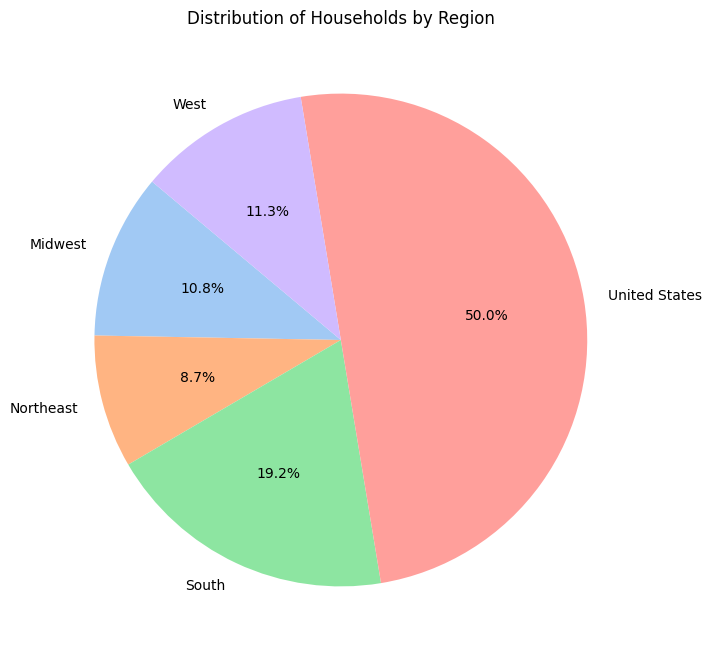

In [27]:
region_households = df.groupby('Region')['Number of Households (Thousands)'].sum()

# Pie chart of household distribution by region
plt.figure(figsize=(8, 8))
plt.pie(region_households, labels=region_households.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Households by Region')
plt.show()

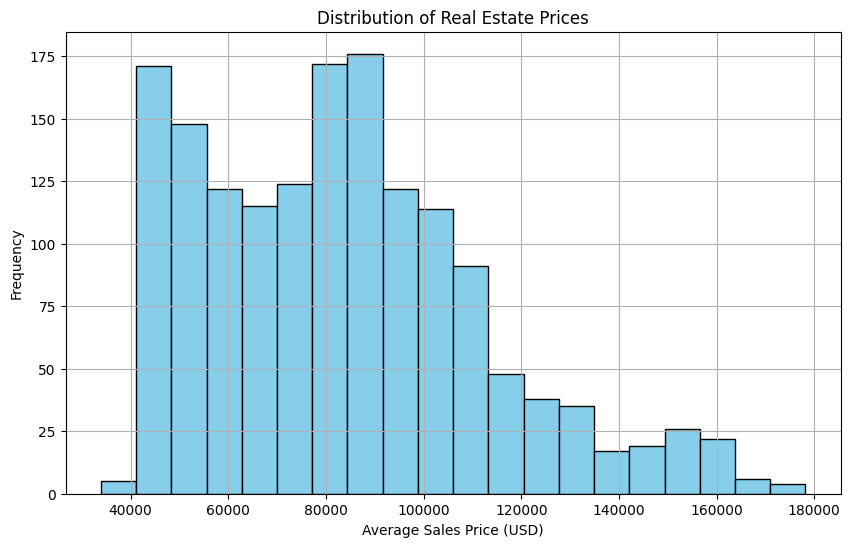

In [28]:
df['Average Sales Price'] = pd.to_numeric(df['Average Sales Price'], errors='coerce')

# Drop rows with missing sales price values
data_cleaned = df.dropna(subset=['Average Sales Price'])

# Creating the histogram
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['Average Sales Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Real Estate Prices')
plt.xlabel('Average Sales Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

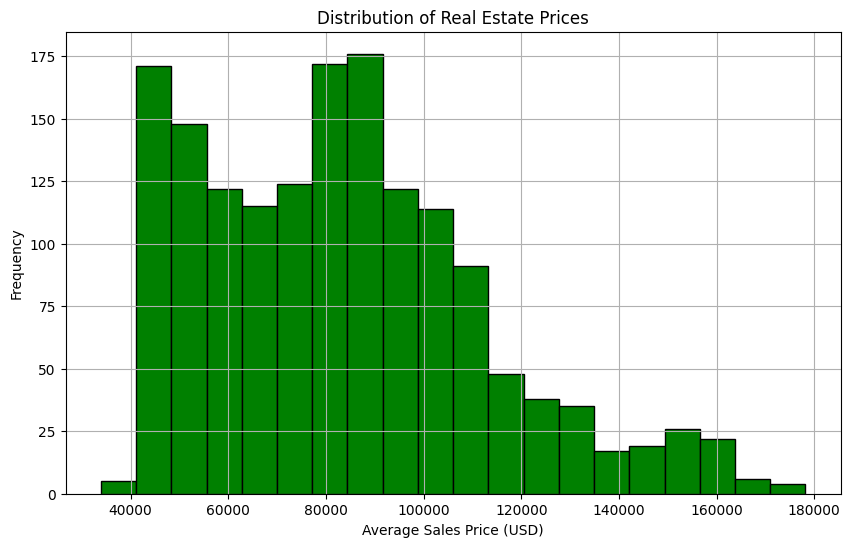

In [31]:
df['Average Sales Price'] = pd.to_numeric(df['Average Sales Price'], errors='coerce')

# Drop rows with missing sales price values
data_cleaned = df.dropna(subset=['Average Sales Price'])

# Creating the histogram
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['Average Sales Price'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Real Estate Prices')
plt.xlabel('Average Sales Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()